# **To explore Unsupervised Machine learning**

In this task, we are given the 'iris' dataset and we are supposed to  predict the optimum number of clusters and represent it visually.


In [ ]:
# importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# read the data
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_label = iris["Species"]
iris.drop(["Id","Species"], inplace=True, axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


This is our dataset that we need to cluster. We have removed the labels so that this comes under unsupervised machine learning.

In [ ]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Since there is no null value present in the dataset. So, there is no requirement of data preprocessing.

## **K-means Clustering**

We don't know how many clusters are to be formed from the given data. So, the task is to find the optimum number of clusters for K-means. Thus, we will be using elbow method.

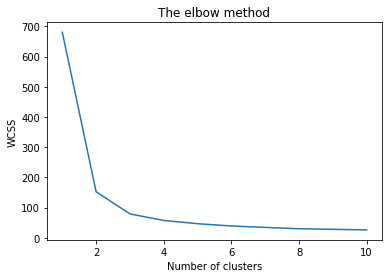

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(iris)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

From the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as '**3**'.

### **Train the model with optimal clusters**

In [27]:
# Applyingk-means to our dataset
model = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_hat = model.fit_predict(iris)

In [28]:
iris = np.array(iris)

### **Visualizing our K-clustering model**

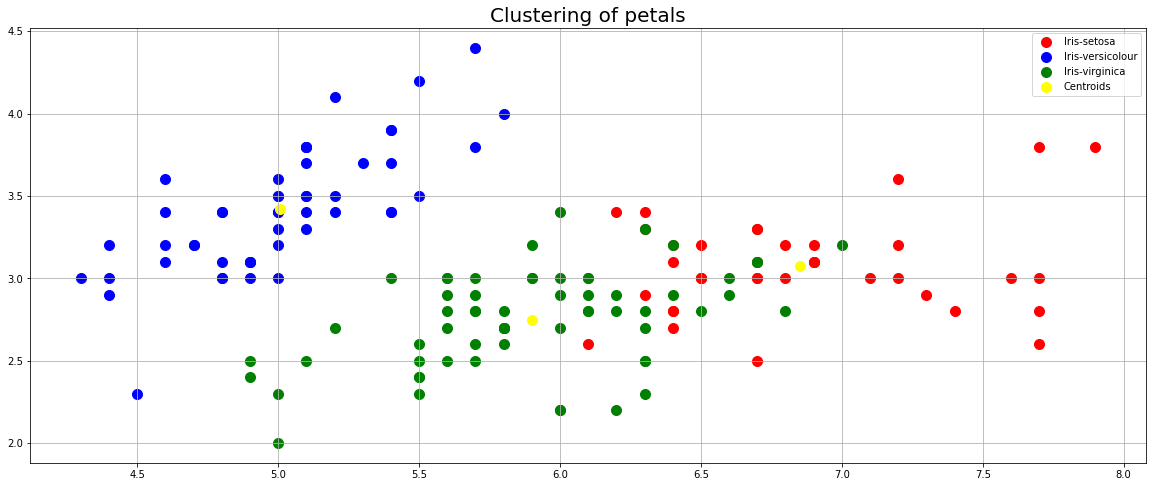

In [30]:
# Visualizing the clusters on first two columns
plt.figure(figsize=(20,8))
plt.scatter(iris[y_hat == 0, 0], iris[y_hat == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(iris[y_hat == 1, 0], iris[y_hat == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(iris[y_hat == 2, 0], iris[y_hat == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clustering of petals', color = 'black', size = 20)
plt.grid()
plt.legend()

This shows how K-means has clusteres the data into three different clusters.